<img style="float: left; margin: 30px 15px 15px 15px;" src="https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTFzQj91sOlkeDFkg5HDbjtR4QJYmLXkfMNig&usqp=CAU" width="400" height="500" /> 
    
    
### <font color='navy'> Modelos no lineales para pronósticos. 

**Nombres:** Xander Gallegos, Sergio Daniel Dueñas.

**Fecha:** 12 de marzo de 2024.

**Expediente** : 737989, XXXXXX.
    
**Profesor:** Oscar David Jaramillo Zuluaga.
    
**Link Github**: <https://github.com/xagallegos/ProyectoConjunto_T5_XGallegos_SDDuenas>

# Tarea 5: Clase 13

## Enunciado de tarea 
> Implementar todas las técnicas vistas en esta clase al siguiente dataset para predecir el precio de las viviendas:
<https://www.kaggle.com/datasets/yasserh/housing-prices-dataset>

Código de solución estudiante 1

In [1]:
import numpy as np
import pandas as pd
from keras import layers
from keras.models import Sequential, Model
import matplotlib.pyplot as plt

In [2]:
target_col = 'price'

data = pd.read_csv('Housing.csv')
data.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


### 1. Modelo CNN univariado

In [3]:
# dividir una secuencia univariada en muestras
def split_univariate_sequence(sequence, n_steps):
    X, y = list(), list()
    for i in range(len(sequence)):
        # encontrar el final de este patrón
        end_ix = i + n_steps
        
        # comprobar si estamos más allá de la secuencia
        if end_ix > len(sequence)-1:
            break
        # reunir partes de entrada y salida del patrón
        seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
        X.append(seq_x)
        y.append(seq_y)
    return np.array(X), np.array(y)

In [4]:
n_steps = 3

# Dividir en muestras
X, y = split_univariate_sequence(data[target_col], n_steps)

In [5]:
X = X.reshape((X.shape[0], X.shape[1], 1))

print(f'X: {X.shape}')
print(f'y: {y.shape}')

X: (542, 3, 1)
y: (542,)


In [6]:
model_1 = Sequential([
    layers.Input(shape=(n_steps,1)),
    layers.convolutional.Conv1D(64, 2, activation='relu'),
    layers.convolutional.MaxPooling1D(),
    layers.Flatten(),
    layers.Dense(50, 'relu'),
    layers.Dense(1)
])

model_1.compile(optimizer='adam', loss='mse')
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 2, 64)             192       
                                                                 
 max_pooling1d (MaxPooling1D  (None, 1, 64)            0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 64)                0         
                                                                 
 dense (Dense)               (None, 50)                3250      
                                                                 
 dense_1 (Dense)             (None, 1)                 51        
                                                                 
Total params: 3,493
Trainable params: 3,493
Non-trainable params: 0
______________________________________________________

In [7]:
history_1 = model_1.fit(X, y, epochs=100, verbose=False)

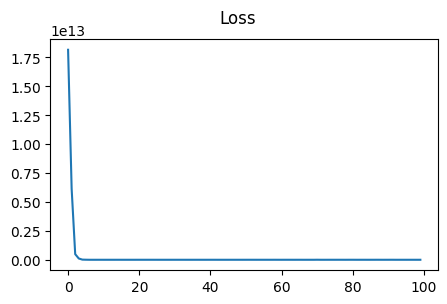

In [8]:
plt.figure(figsize=(5,3))

plt.plot(history_1.history['loss'])
plt.suptitle('Loss')

plt.show()

### 2. Modelos CNN multivariados

#### 2.1 Series de entradas múltiples

In [9]:
# dividir una secuencia multivariada en muestras
def split_multivariate_sequence(sequence: np.ndarray, n_steps: int):
    X, y = list(), list()
    for i in range(len(sequence)):
        # encontrar el final de este patrón
        end_ix = i + n_steps
        
        # comprobar si estamos más allá de la secuencia
        if end_ix > len(sequence):
            break
        # reunir partes de entrada y salida del patrón
        seq_x, seq_y = sequence[i:end_ix, :-1], sequence[end_ix - 1, -1]
        X.append(seq_x)
        y.append(seq_y)
    return np.array(X), np.array(y)

In [10]:
numeric_data = data.select_dtypes(include='number')

# Reorder columns
cols = [c for c in numeric_data.columns if c != target_col]
cols += [target_col]
numeric_data = numeric_data[cols]

In [11]:
X, y = split_multivariate_sequence(numeric_data.to_numpy(), n_steps)
n_features = X.shape[2]

print(f'X: {X.shape}')
print(f'y: {y.shape}')

X: (543, 3, 5)
y: (543,)


In [12]:
model_2 = Sequential([
    layers.Input(shape=(n_steps, n_features)),
    layers.convolutional.Conv1D(64, 2,  activation='relu'),
    layers.convolutional.MaxPooling1D(),
    layers.Flatten(),
    layers.Dense(50, 'relu'),
    layers.Dense(1)
    
])

model_2.compile(optimizer='adam', loss='mse')
model_2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_1 (Conv1D)           (None, 2, 64)             704       
                                                                 
 max_pooling1d_1 (MaxPooling  (None, 1, 64)            0         
 1D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 64)                0         
                                                                 
 dense_2 (Dense)             (None, 50)                3250      
                                                                 
 dense_3 (Dense)             (None, 1)                 51        
                                                                 
Total params: 4,005
Trainable params: 4,005
Non-trainable params: 0
____________________________________________________

In [13]:
history_2 = model_2.fit(X, y, epochs=100, verbose=False)

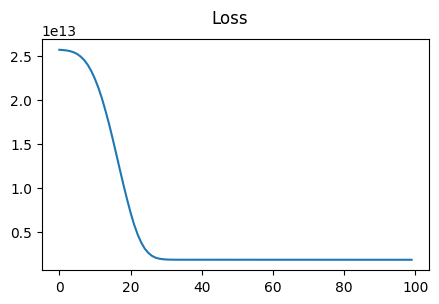

In [14]:
plt.figure(figsize=(5,3))

plt.plot(history_2.history['loss'])
plt.suptitle('Loss')

plt.show()

**Modelo con múltiples encabezamientos**

In [15]:
def create_submodel(steps, features):
    visible = layers.Input((steps, features))
    cnn = layers.convolutional.Conv1D(64, 2, activation='relu')(visible)
    cnn = layers.convolutional.MaxPooling1D()(cnn)
    cnn = layers.Flatten()(cnn)
    return visible, cnn

In [16]:
n_features = 1
submodels = [create_submodel(steps=n_steps, features=n_features) for x in range(X.shape[-1])]
inputs = [x[0] for x in submodels]
cnns = [x[1] for x in submodels]

merge = layers.merging.concatenate(cnns)
dense = layers.Dense(50, activation='relu')(merge)
output = layers.Dense(1)(dense)

In [17]:
model_3 = Model(inputs=[inputs], outputs=[output])
model_3.compile(optimizer='adam', loss='mse')
model_3.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 3, 1)]       0           []                               
                                                                                                  
 input_4 (InputLayer)           [(None, 3, 1)]       0           []                               
                                                                                                  
 input_5 (InputLayer)           [(None, 3, 1)]       0           []                               
                                                                                                  
 input_6 (InputLayer)           [(None, 3, 1)]       0           []                               
                                                                                              

In [18]:
# Separar entradas
X1 = X[:, :, 0].reshape(X.shape[0], X.shape[1], n_features)
X2 = X[:, :, 1].reshape(X.shape[0], X.shape[1], n_features)
X3 = X[:, :, 2].reshape(X.shape[0], X.shape[1], n_features)
X4 = X[:, :, 3].reshape(X.shape[0], X.shape[1], n_features)
X5 = X[:, :, 4].reshape(X.shape[0], X.shape[1], n_features)

print(X1.shape)

(543, 3, 1)


In [19]:
history_3 = model_3.fit([X1, X2, X3, X4, X5], y, epochs=100, verbose=0)

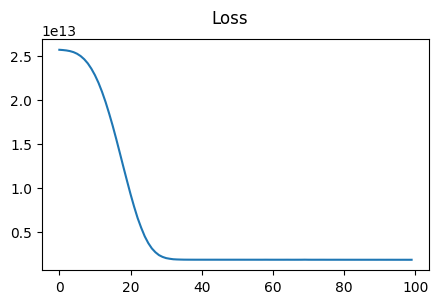

In [20]:
plt.figure(figsize=(5,3))

plt.plot(history_3.history['loss'])
plt.suptitle('Loss')

plt.show()

#### 2.2 Múltiples series paralelas

In [21]:
# dividir una secuencia multivariada en muestras para predicción múltiple
def split_multiple_forecasting_sequence(sequence, n_steps):
    X, y = list(), list()
    for i in range(len(sequence)):
        # encontrar el final de este patrón
        end_ix = i + n_steps
        
        # comprobar si estamos más allá de la secuencia
        if end_ix > len(sequence)-1:
            break
        # reunir partes de entrada y salida del patrón
        seq_x, seq_y = sequence[i:end_ix, :], sequence[end_ix, :]
        X.append(seq_x)
        y.append(seq_y)
    return np.array(X), np.array(y)

In [22]:
X, y = split_multiple_forecasting_sequence(numeric_data.to_numpy(), n_steps)

print(f'X: {X.shape}')
print(f'y: {y.shape}')

X: (542, 3, 6)
y: (542, 6)


In [23]:
n_features = X.shape[2]

model_4 = Sequential([
    layers.Input(shape=(n_steps, n_features)),
    layers.convolutional.Conv1D(64, 2, activation='relu'),
    layers.convolutional.MaxPooling1D(),
    layers.Flatten(),
    layers.Dense(50, activation='relu'),
    layers.Dense(n_features)
])

model_4.compile(optimizer='adam', loss='mse')

model_4.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_7 (Conv1D)           (None, 2, 64)             832       
                                                                 
 max_pooling1d_7 (MaxPooling  (None, 1, 64)            0         
 1D)                                                             
                                                                 
 flatten_7 (Flatten)         (None, 64)                0         
                                                                 
 dense_6 (Dense)             (None, 50)                3250      
                                                                 
 dense_7 (Dense)             (None, 6)                 306       
                                                                 
Total params: 4,388
Trainable params: 4,388
Non-trainable params: 0
____________________________________________________

In [24]:
history_4 = model_4.fit(X, y, epochs=100, verbose=0)

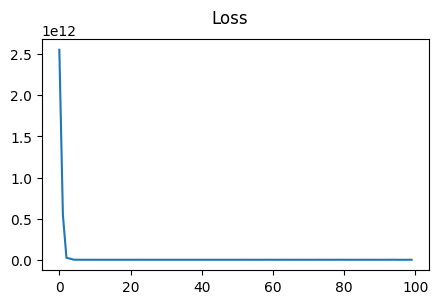

In [25]:
plt.figure(figsize=(5,3))

plt.plot(history_4.history['loss'])
plt.suptitle('Loss')

plt.show()

**Modelo CNN con múltiples salidas**

In [26]:
visible = layers.Input(shape=(n_steps, n_features))
cnn = layers.convolutional.Conv1D(64, 2, activation='relu')(visible)
cnn = layers.convolutional.MaxPooling1D()(cnn)
cnn = layers.Flatten()(cnn)
cnn = layers.Dense(50, activation='relu')(cnn)

In [27]:
outputs = [layers.Dense(1, name=f'output_{i+1}')(cnn) for i in range(X.shape[-1])]

model_5 = Model(inputs=visible, outputs=outputs)
model_5.compile(optimizer='adam', loss='mse')

model_5.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_9 (InputLayer)           [(None, 3, 6)]       0           []                               
                                                                                                  
 conv1d_8 (Conv1D)              (None, 2, 64)        832         ['input_9[0][0]']                
                                                                                                  
 max_pooling1d_8 (MaxPooling1D)  (None, 1, 64)       0           ['conv1d_8[0][0]']               
                                                                                                  
 flatten_8 (Flatten)            (None, 64)           0           ['max_pooling1d_8[0][0]']        
                                                                                            

In [28]:
history_5 = model_5.fit(X, y.reshape((-1,1,6)), epochs=150, verbose=0)

<Figure size 500x300 with 0 Axes>

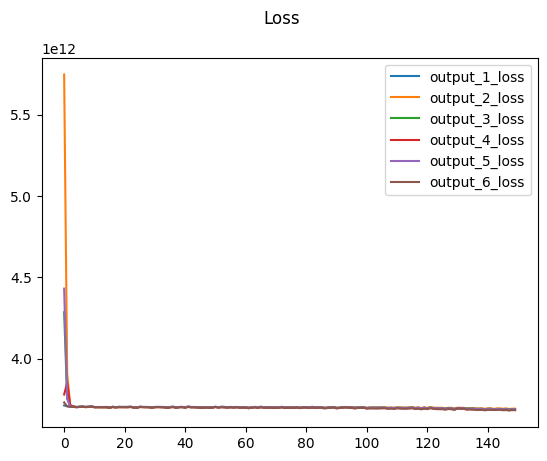

In [29]:
plt.figure(figsize=(5,3))

pd.DataFrame(history_5.history).drop(columns=['loss']).plot()
plt.suptitle('Loss')

plt.legend()
plt.show()

### 3. Modelos CNN de pasos múltiples

#### 3.1 Serie temporal univariada

In [30]:
# dividir una secuencia univariada en muestras
def split_univariate_sequence_m_step(sequence, n_steps_in, n_steps_out):
    X, y = list(), list()
    for i in range(len(sequence)):
        # encontrar el final de este patrón
        end_ix = i + n_steps_in
        out_end_ix = end_ix + n_steps_out
        
        # comprobar si estamos más allá de la secuencia
        if out_end_ix > len(sequence):
            break
        # reunir partes de entrada y salida del patrón
        seq_x, seq_y = sequence[i:end_ix], sequence[end_ix:out_end_ix]
        X.append(seq_x)
        y.append(seq_y)
    return np.array(X), np.array(y)

In [31]:
n_features = 1
n_steps_in, n_steps_out = 3, 2

X, y = split_univariate_sequence_m_step(data[target_col], n_steps_in, n_steps_out)
X = X.reshape((X.shape[0], X.shape[1], n_features))

print(f'X: {X.shape}')
print(f'y: {y.shape}')

X: (541, 3, 1)
y: (541, 2)


In [32]:
model_6 = Sequential([
    layers.Input(shape=(n_steps_in, n_features)),
    layers.convolutional.Conv1D(64, 2, activation='relu'),
    layers.convolutional.MaxPooling1D(),
    layers.Flatten(),
    layers.Dense(50, activation='relu'),
    layers.Dense(n_steps_out)
])

model_6.compile(optimizer='adam', loss='mse')

model_6.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_9 (Conv1D)           (None, 2, 64)             192       
                                                                 
 max_pooling1d_9 (MaxPooling  (None, 1, 64)            0         
 1D)                                                             
                                                                 
 flatten_9 (Flatten)         (None, 64)                0         
                                                                 
 dense_9 (Dense)             (None, 50)                3250      
                                                                 
 dense_10 (Dense)            (None, 2)                 102       
                                                                 
Total params: 3,544
Trainable params: 3,544
Non-trainable params: 0
____________________________________________________

In [33]:
history_6 = model_6.fit(X, y, epochs=100, verbose=0)

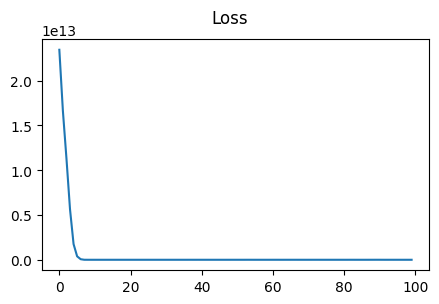

In [34]:
plt.figure(figsize=(5,3))

plt.plot(history_6.history['loss'])
plt.suptitle('Loss')

plt.show()

#### 3.2 Serie temporal multivariada

In [35]:
# dividir una secuencia multivariada en muestras
def split_multivariate_sequence_m_step(sequence: np.ndarray, n_steps_in: int, n_steps_out: int):
    X, y = list(), list()
    for i in range(len(sequence)):
        # encontrar el final de este patrón
        end_ix = i + n_steps_in
        out_end_ix = end_ix + n_steps_out - 1
        
        # comprobar si estamos más allá de la secuencia
        if out_end_ix > len(sequence):
            break
        # reunir partes de entrada y salida del patrón
        seq_x, seq_y = sequence[i:end_ix, :-1], sequence[end_ix-1:out_end_ix, -1]
        X.append(seq_x)
        y.append(seq_y)
    return np.array(X), np.array(y)

In [36]:
X, y = split_multivariate_sequence_m_step(numeric_data.to_numpy(), n_steps_in, n_steps_out)

print(f'X: {X.shape}')
print(f'y: {y.shape}')

X: (542, 3, 5)
y: (542, 2)


In [40]:
n_features = X.shape[2]

# Definir el modelo 
model_7 = Sequential([
    layers.Input(shape=(n_steps_in, n_features)),
    layers.convolutional.Conv1D(64, 2, activation='relu'),
    layers.convolutional.MaxPooling1D(),
    layers.Flatten(),
    layers.Dense(50, activation='relu'),
    layers.Dense(n_steps_out)
])

model_7.compile(optimizer='adam', loss='mse')

model_7.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_11 (Conv1D)          (None, 2, 64)             704       
                                                                 
 max_pooling1d_11 (MaxPoolin  (None, 1, 64)            0         
 g1D)                                                            
                                                                 
 flatten_11 (Flatten)        (None, 64)                0         
                                                                 
 dense_13 (Dense)            (None, 50)                3250      
                                                                 
 dense_14 (Dense)            (None, 2)                 102       
                                                                 
Total params: 4,056
Trainable params: 4,056
Non-trainable params: 0
____________________________________________________

In [41]:
history_7 = model_7.fit(X, y, epochs=100, verbose=0)

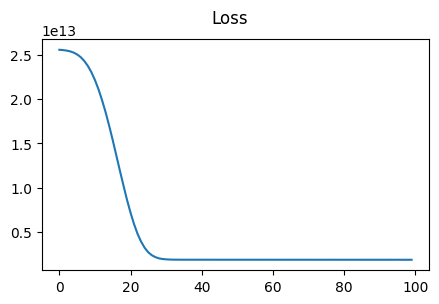

In [42]:
plt.figure(figsize=(5,3))

plt.plot(history_7.history['loss'])
plt.suptitle('Loss')

plt.show()

#### 3.3 Serie temporal multivariada predicción múltiple de cada entrada

In [43]:
# dividir una secuencia multivariada en muestras
def split_multivariate_sequence_m_step_parallel(sequence: np.ndarray, n_steps_in: int, n_steps_out: int):
    X, y = list(), list()
    for i in range(len(sequence)):
        # encontrar el final de este patrón
        end_ix = i + n_steps_in
        out_end_ix = end_ix + n_steps_out
        
        # comprobar si estamos más allá de la secuencia
        if out_end_ix > len(sequence):
            break
        # reunir partes de entrada y salida del patrón
        seq_x, seq_y = sequence[i:end_ix, :], sequence[end_ix:out_end_ix, :]
        X.append(seq_x)
        y.append(seq_y)
    return np.array(X), np.array(y)

In [44]:
X, y = split_multivariate_sequence_m_step_parallel(numeric_data.to_numpy(), n_steps_in, n_steps_out)

n_output = y.shape[1] * y.shape[2]
y = y.reshape((y.shape[0], n_output))

print(f'X: {X.shape}')
print(f'y: {y.shape}')

X: (541, 3, 6)
y: (541, 12)


In [45]:
n_features = X.shape[2]

model_8 = Sequential([
    layers.Input(shape=(n_steps_in, n_features)),
    layers.convolutional.Conv1D(64, 2, activation='relu'),
    layers.convolutional.MaxPooling1D(),
    layers.Flatten(),
    layers.Dense(50, activation='relu'),
    layers.Dense(n_output)
])

model_8.compile(optimizer='adam', loss='mse')

In [46]:
history_8 = model_8.fit(X, y, epochs=100, verbose=0)

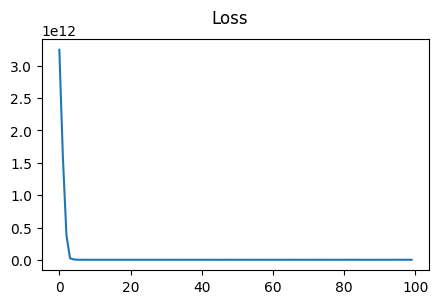

In [47]:
plt.figure(figsize=(5,3))

plt.plot(history_8.history['loss'])
plt.suptitle('Loss')

plt.show()

Código de solución estudiante 2

In [52]:
# Paqueterías necesarias
import numpy as np
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Conv1D
from keras.layers import MaxPooling1D
import tensorflow as tf

In [24]:
# Importamos los datos
data = pd.read_csv("Housing.csv")

#### Preparación de datos

In [25]:
data["furnishingstatus"].describe()

count                545
unique                 3
top       semi-furnished
freq                 227
Name: furnishingstatus, dtype: object

In [26]:
# Definir las columnas a codificar con 'yes' y 'no'
columns_to_encode = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']

# Reemplazar 'yes' por 1 y 'no' por 0 en las columnas seleccionadas
for col in columns_to_encode:
    data[col] = data[col].map({'yes': 1, 'no': 0})

# One-hot encoding para la columna 'furnishingstatus'
data = pd.get_dummies(data, columns=['furnishingstatus'])

In [27]:
data.columns

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus_furnished',
       'furnishingstatus_semi-furnished', 'furnishingstatus_unfurnished'],
      dtype='object')

### 1. Modelos CNN univariados

In [28]:
# dividir una secuencia univariada en muestras
def split_univariate_sequence(sequence, n_steps):
    X, y = list(), list()
    for i in range(len(sequence)):
        # encontrar el final de este patrón
        end_ix = i + n_steps
        
        # comprobar si estamos más allá de la secuencia
        if end_ix > len(sequence)-1:
            break
        # reunir partes de entrada y salida del patrón
        seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
        X.append(seq_x)
        y.append(seq_y)
    return np.array(X), np.array(y)

In [29]:
# Definir la secuencia de entrada
raw_seq = data["price"]
# Elegir un número de pasos de tiempo
n_steps = 3
# Número de características de mis datos
n_features = 1
# Dividir en muestras
X, y = split_univariate_sequence(raw_seq, n_steps)

print('X', X, 'y', y, sep='\n')

X
[[13300000 12250000 12250000]
 [12250000 12250000 12215000]
 [12250000 12215000 11410000]
 ...
 [ 1855000  1820000  1767150]
 [ 1820000  1767150  1750000]
 [ 1767150  1750000  1750000]]
y
[12215000 11410000 10850000 10150000 10150000  9870000  9800000  9800000
  9681000  9310000  9240000  9240000  9100000  9100000  8960000  8890000
  8855000  8750000  8680000  8645000  8645000  8575000  8540000  8463000
  8400000  8400000  8400000  8400000  8400000  8295000  8190000  8120000
  8080940  8043000  7980000  7962500  7910000  7875000  7840000  7700000
  7700000  7560000  7560000  7525000  7490000  7455000  7420000  7420000
  7420000  7350000  7350000  7350000  7350000  7343000  7245000  7210000
  7210000  7140000  7070000  7070000  7035000  7000000  6930000  6930000
  6895000  6860000  6790000  6790000  6755000  6720000  6685000  6650000
  6650000  6650000  6650000  6650000  6650000  6629000  6615000  6615000
  6580000  6510000  6510000  6510000  6475000  6475000  6440000  6440000
  64190

In [30]:
# Definimos nuestro modelo
model_1 = Sequential()
model_1.add(Conv1D(64, 2, activation='relu', input_shape=(n_steps, n_features)))
model_1.add(MaxPooling1D())
model_1.add(Flatten())
model_1.add(Dense(50, activation='relu'))
model_1.add(Dense(1))
model_1.compile(optimizer='adam', loss='mse')
model_1.summary()

/opt/homebrew/Caskroom/miniforge/base/envs/modelos/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d_4 (Conv1D)               │ (None, 2, 64)          │           192 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_4 (MaxPooling1D)  │ (None, 1, 64)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_4 (Flatten)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 50)             │         3,250 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,493 (13.64 KB)

 Trainable params: 3,493 (13.64 KB)

 Non-trainable params: 0 (0.00 B)

In [31]:
# Cambiar la forma de X para que coincida con la entrada esperada del modelo
X = X.reshape((X.shape[0], X.shape[1], n_features))

In [32]:
# Entrenar el modelo
history_1 = model_1.fit(X, y, epochs=500, verbose=False)

<Axes: >

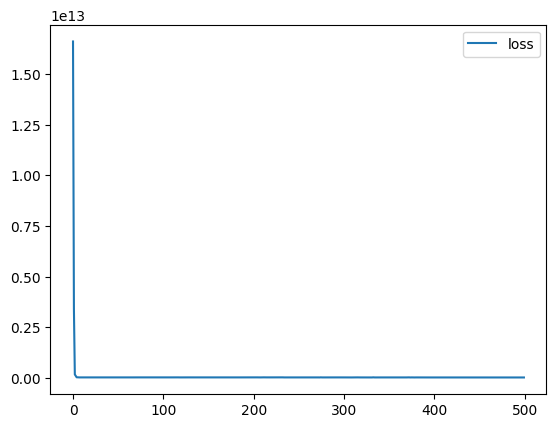

In [33]:
# Visualizar la historia del entrenamiento
pd.DataFrame(history_1.history).plot()

In [34]:
# Probamos nuestro modelo 
x_input = np.array([70, 80, 90])
x_input = x_input.reshape((1, n_steps, n_features))
yhat = model_1.predict(x_input, verbose=0)
yhat

array([[107.69952]], dtype=float32)

## 2. Modelos CNN multivariados

### 2.1 Series de entradas múltiples

In [35]:
# Función para dividir una secuencia multivariada en muestras
def split_multivariate_sequence(sequence, n_steps):
    X, y = list(), list()
    for i in range(len(sequence)):
        # Encontrar el final de este patrón
        end_ix = i + n_steps

        # Comprobar si estamos más allá de la secuencia
        if end_ix > len(sequence):
            break

        # Reunir partes de entrada y salida del patrón
        seq_x, seq_y = sequence[i:end_ix, :-1], sequence[end_ix - 1, -1]
        X.append(seq_x)
        y.append(seq_y)
    return np.array(X), np.array(y)

In [36]:
abs(data.corr()["price"]).sort_values(ascending=False)

price                              1.000000
area                               0.535997
bathrooms                          0.517545
airconditioning                    0.452954
stories                            0.420712
parking                            0.384394
bedrooms                           0.366494
prefarea                           0.329777
mainroad                           0.296898
furnishingstatus_unfurnished       0.280587
guestroom                          0.255517
furnishingstatus_furnished         0.229350
basement                           0.187057
hotwaterheating                    0.093073
furnishingstatus_semi-furnished    0.063656
Name: price, dtype: float64

In [37]:
# Seleccioné solo las primeras 2 columnas con más autocorrelacion
input_data = data[['area', 'bathrooms', 'price']].values

# Número de pasos de tiempo (en este caso, se utilizarán 3 pasos de tiempo)
n_steps = 3

# Dividir en muestras
X, y = split_multivariate_sequence(input_data, n_steps)

# Número de características de los datos (se excluye la columna de salida 'price')
n_features = X.shape[2]

In [38]:
# Definir el modelo
model_2 = Sequential()
model_2.add(Conv1D(64, 2, activation='relu', input_shape=(n_steps, n_features)))
model_2.add(MaxPooling1D())
model_2.add(Flatten())
model_2.add(Dense(50, activation='relu'))
model_2.add(Dense(1))
model_2.compile(optimizer='adam', loss='mse')
model_2.summary()

/opt/homebrew/Caskroom/miniforge/base/envs/modelos/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d_5 (Conv1D)               │ (None, 2, 64)          │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_5 (MaxPooling1D)  │ (None, 1, 64)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_5 (Flatten)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 50)             │         3,250 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,621 (14.14 KB)

 Trainable params: 3,621 (14.14 KB)

 Non-trainable params: 0 (0.00 B)

In [39]:
# Entrenar el modelo
history_2 = model_2.fit(X, y, epochs=500, verbose=False)

<Axes: >

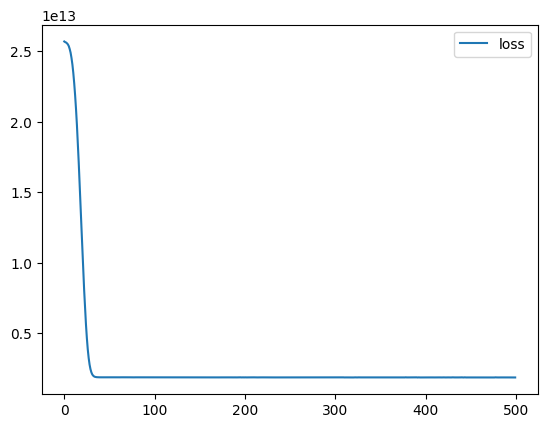

In [40]:
# Visualizar la historia del entrenamiento
pd.DataFrame(history_2.history).plot()

### Modelo CNN con múltiples encabezamientos

In [41]:
# Paqueterías faltantes
from keras.models import Model
from keras.layers import concatenate
from keras.utils import plot_model
from keras.layers import Input

In [42]:
n_features = 1
n_steps = 3

# Primer modelo de entrada
visible1 = Input(shape=(n_steps, n_features))
cnn1 = Conv1D(64, 2, activation='relu')(visible1)
cnn1 = MaxPooling1D()(cnn1)
cnn1 = Flatten()(cnn1)

# Segundo modelo de entrada
visible2 = Input(shape=(n_steps, n_features))
cnn2 = Conv1D(64, 2, activation='relu')(visible2)
cnn2 = MaxPooling1D()(cnn2)
cnn2 = Flatten()(cnn2)

# merge modelos de entrada
merge = concatenate([cnn1, cnn2])
dense = Dense(50, activation='relu')(merge)
output = Dense(1)(dense)

# Conectar entradas y salida del modelo
model_3 = Model(inputs=[visible1, visible2], outputs=output)
model_3.compile(optimizer='adam', loss='mse')
model_3.summary()

Model: "functional_23"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_6       │ (None, 3, 1)      │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ input_layer_7       │ (None, 3, 1)      │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_6 (Conv1D)   │ (None, 2, 64)     │        192 │ input_layer_6[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_7 (Conv1D)   │ (None, 2, 64)     │        192 │ input_layer_7[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling1d_6     │ (None, 1, 64)     │          0 │ conv1d_6[0][0]    │
│ (MaxPooling1D)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling1d_7     │ (None, 1, 64)     │          0 │ conv1d_7[0][0]    │
│ (MaxPooling1D)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten_6 (Flatten) │ (None, 64)        │          0 │ max_pooling1d_6[… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten_7 (Flatten) │ (None, 64)        │          0 │ max_pooling1d_7[… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate_1       │ (None, 128)       │          0 │ flatten_6[0][0],  │
│ (Concatenate)       │                   │            │ flatten_7[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_10 (Dense)    │ (None, 50)        │      6,450 │ concatenate_1[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_11 (Dense)    │ (None, 1)         │         51 │ dense_10[0][0]    │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 6,885 (26.89 KB)

 Trainable params: 6,885 (26.89 KB)

 Non-trainable params: 0 (0.00 B)

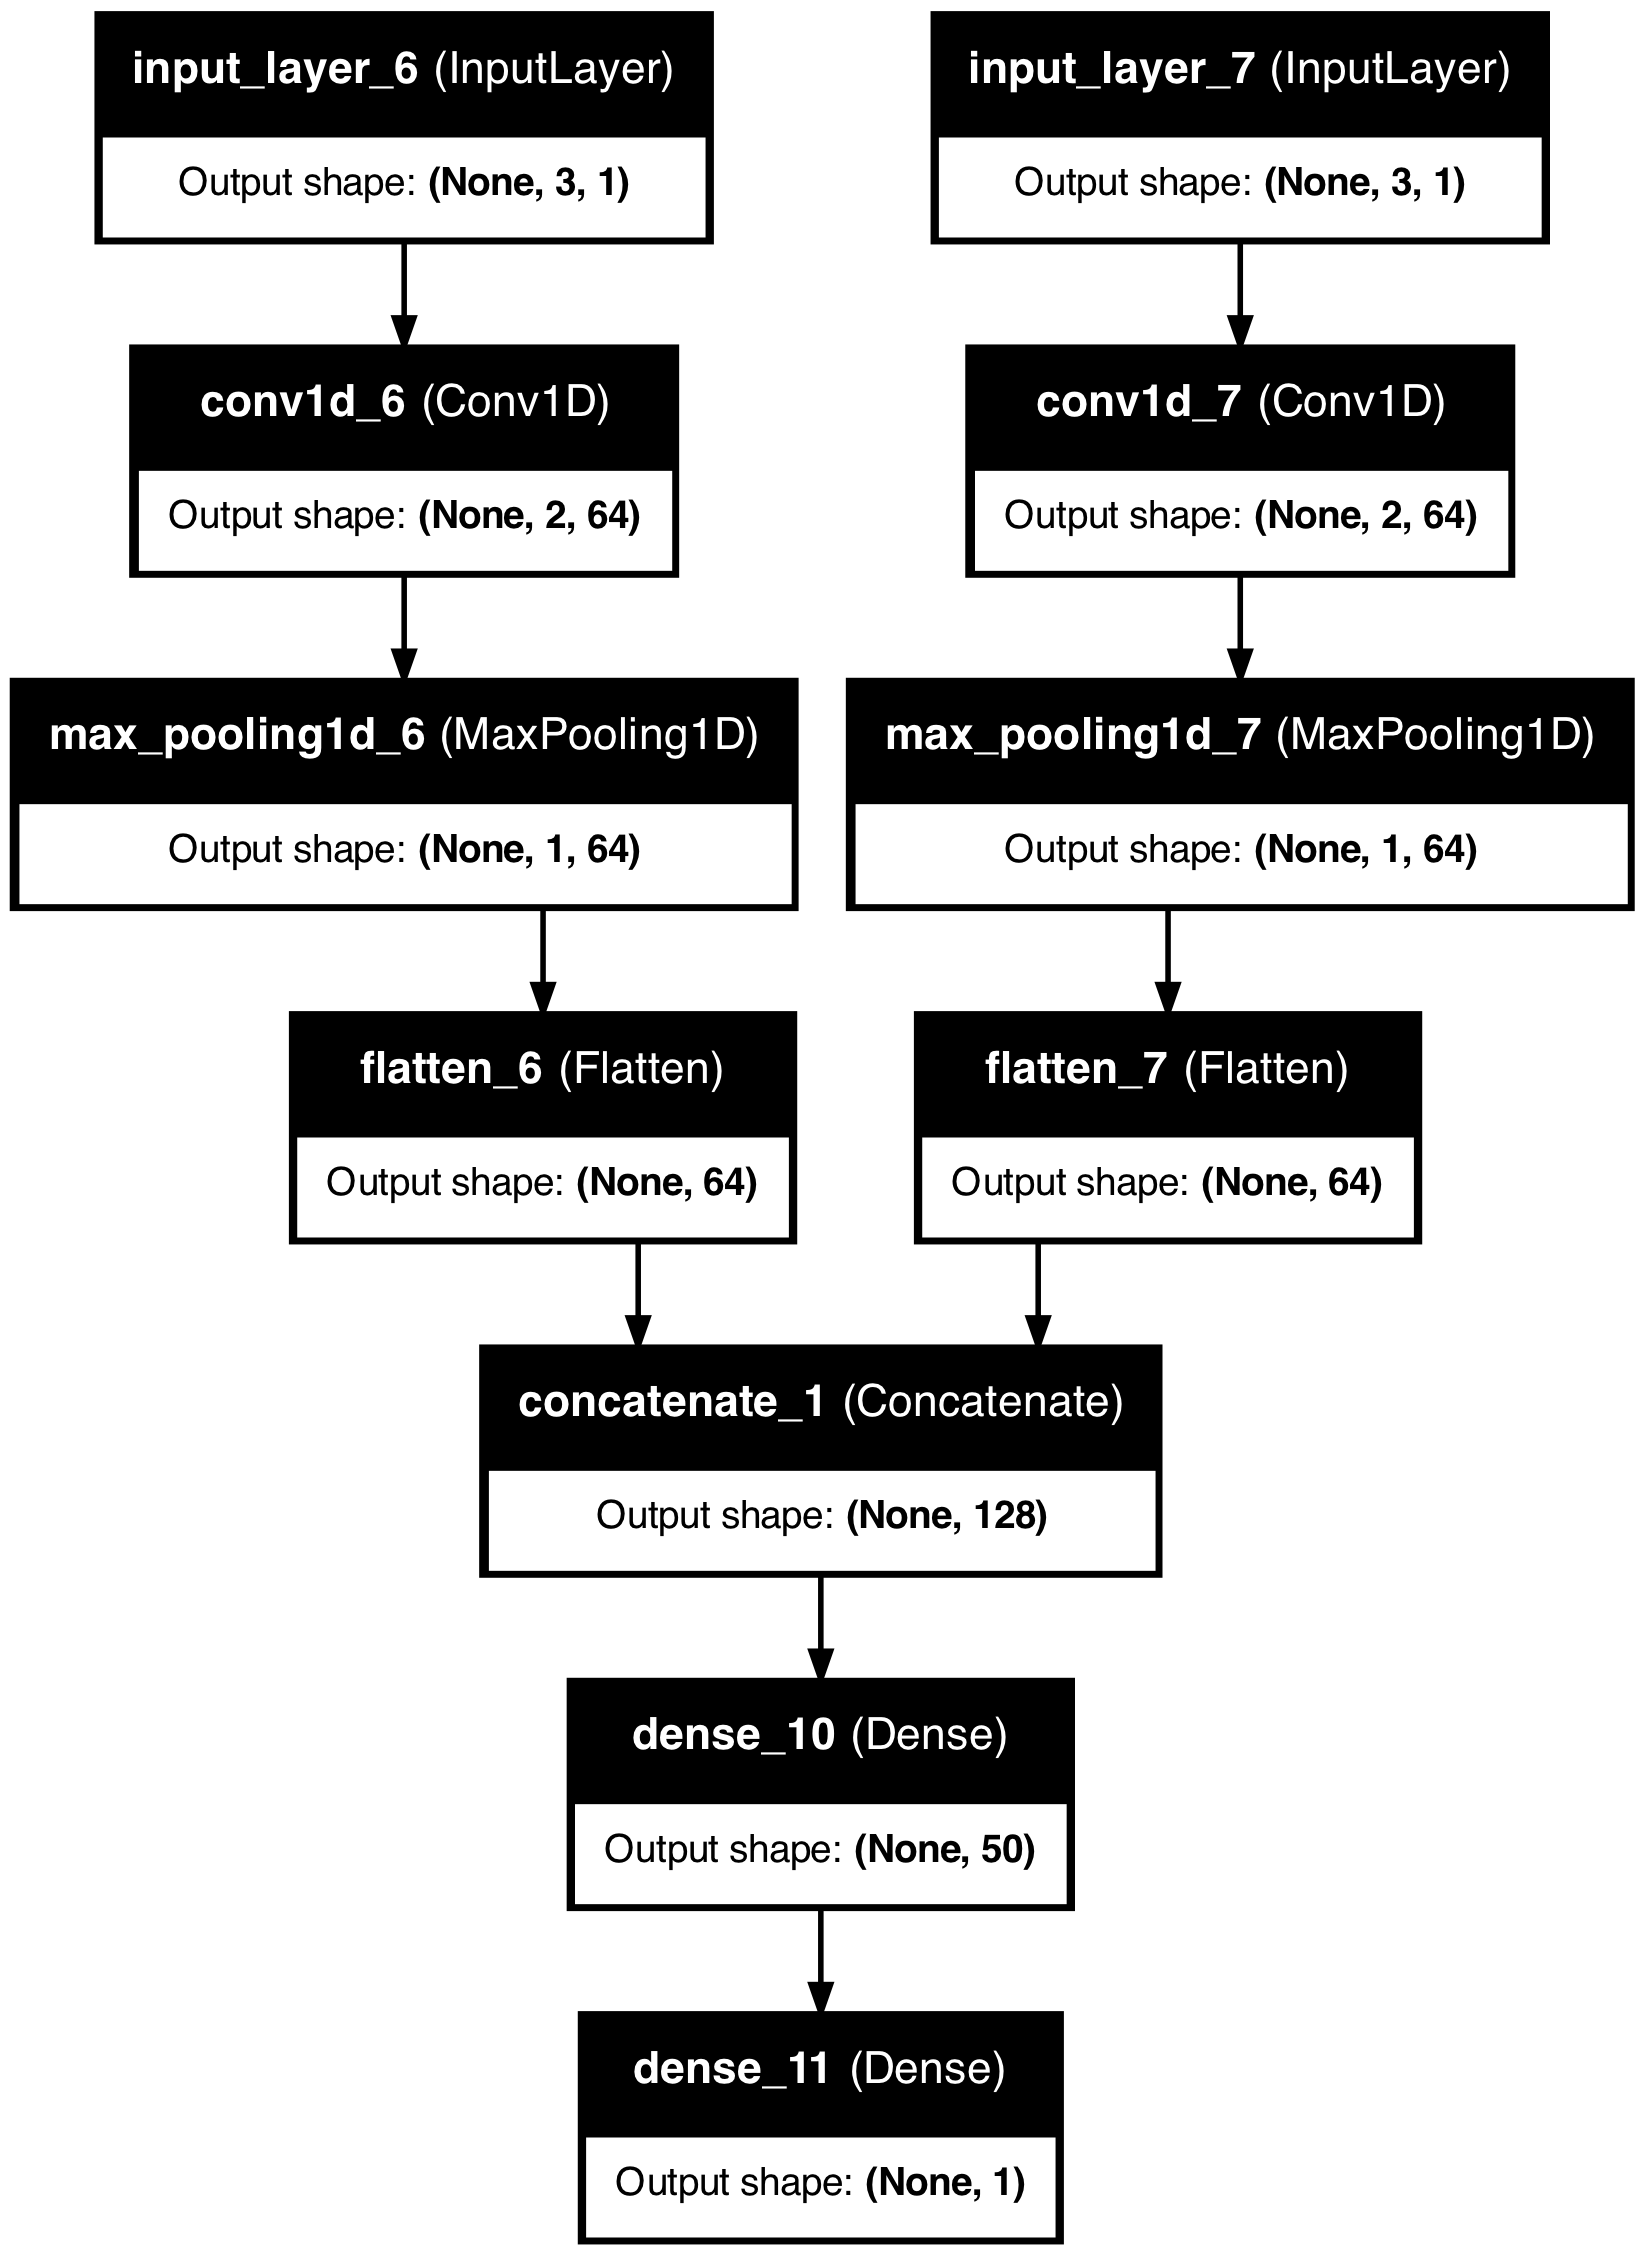

In [43]:
plot_model(model_3, show_shapes=True, show_layer_names=True)

In [47]:
data.columns

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus_furnished',
       'furnishingstatus_semi-furnished', 'furnishingstatus_unfurnished'],
      dtype='object')

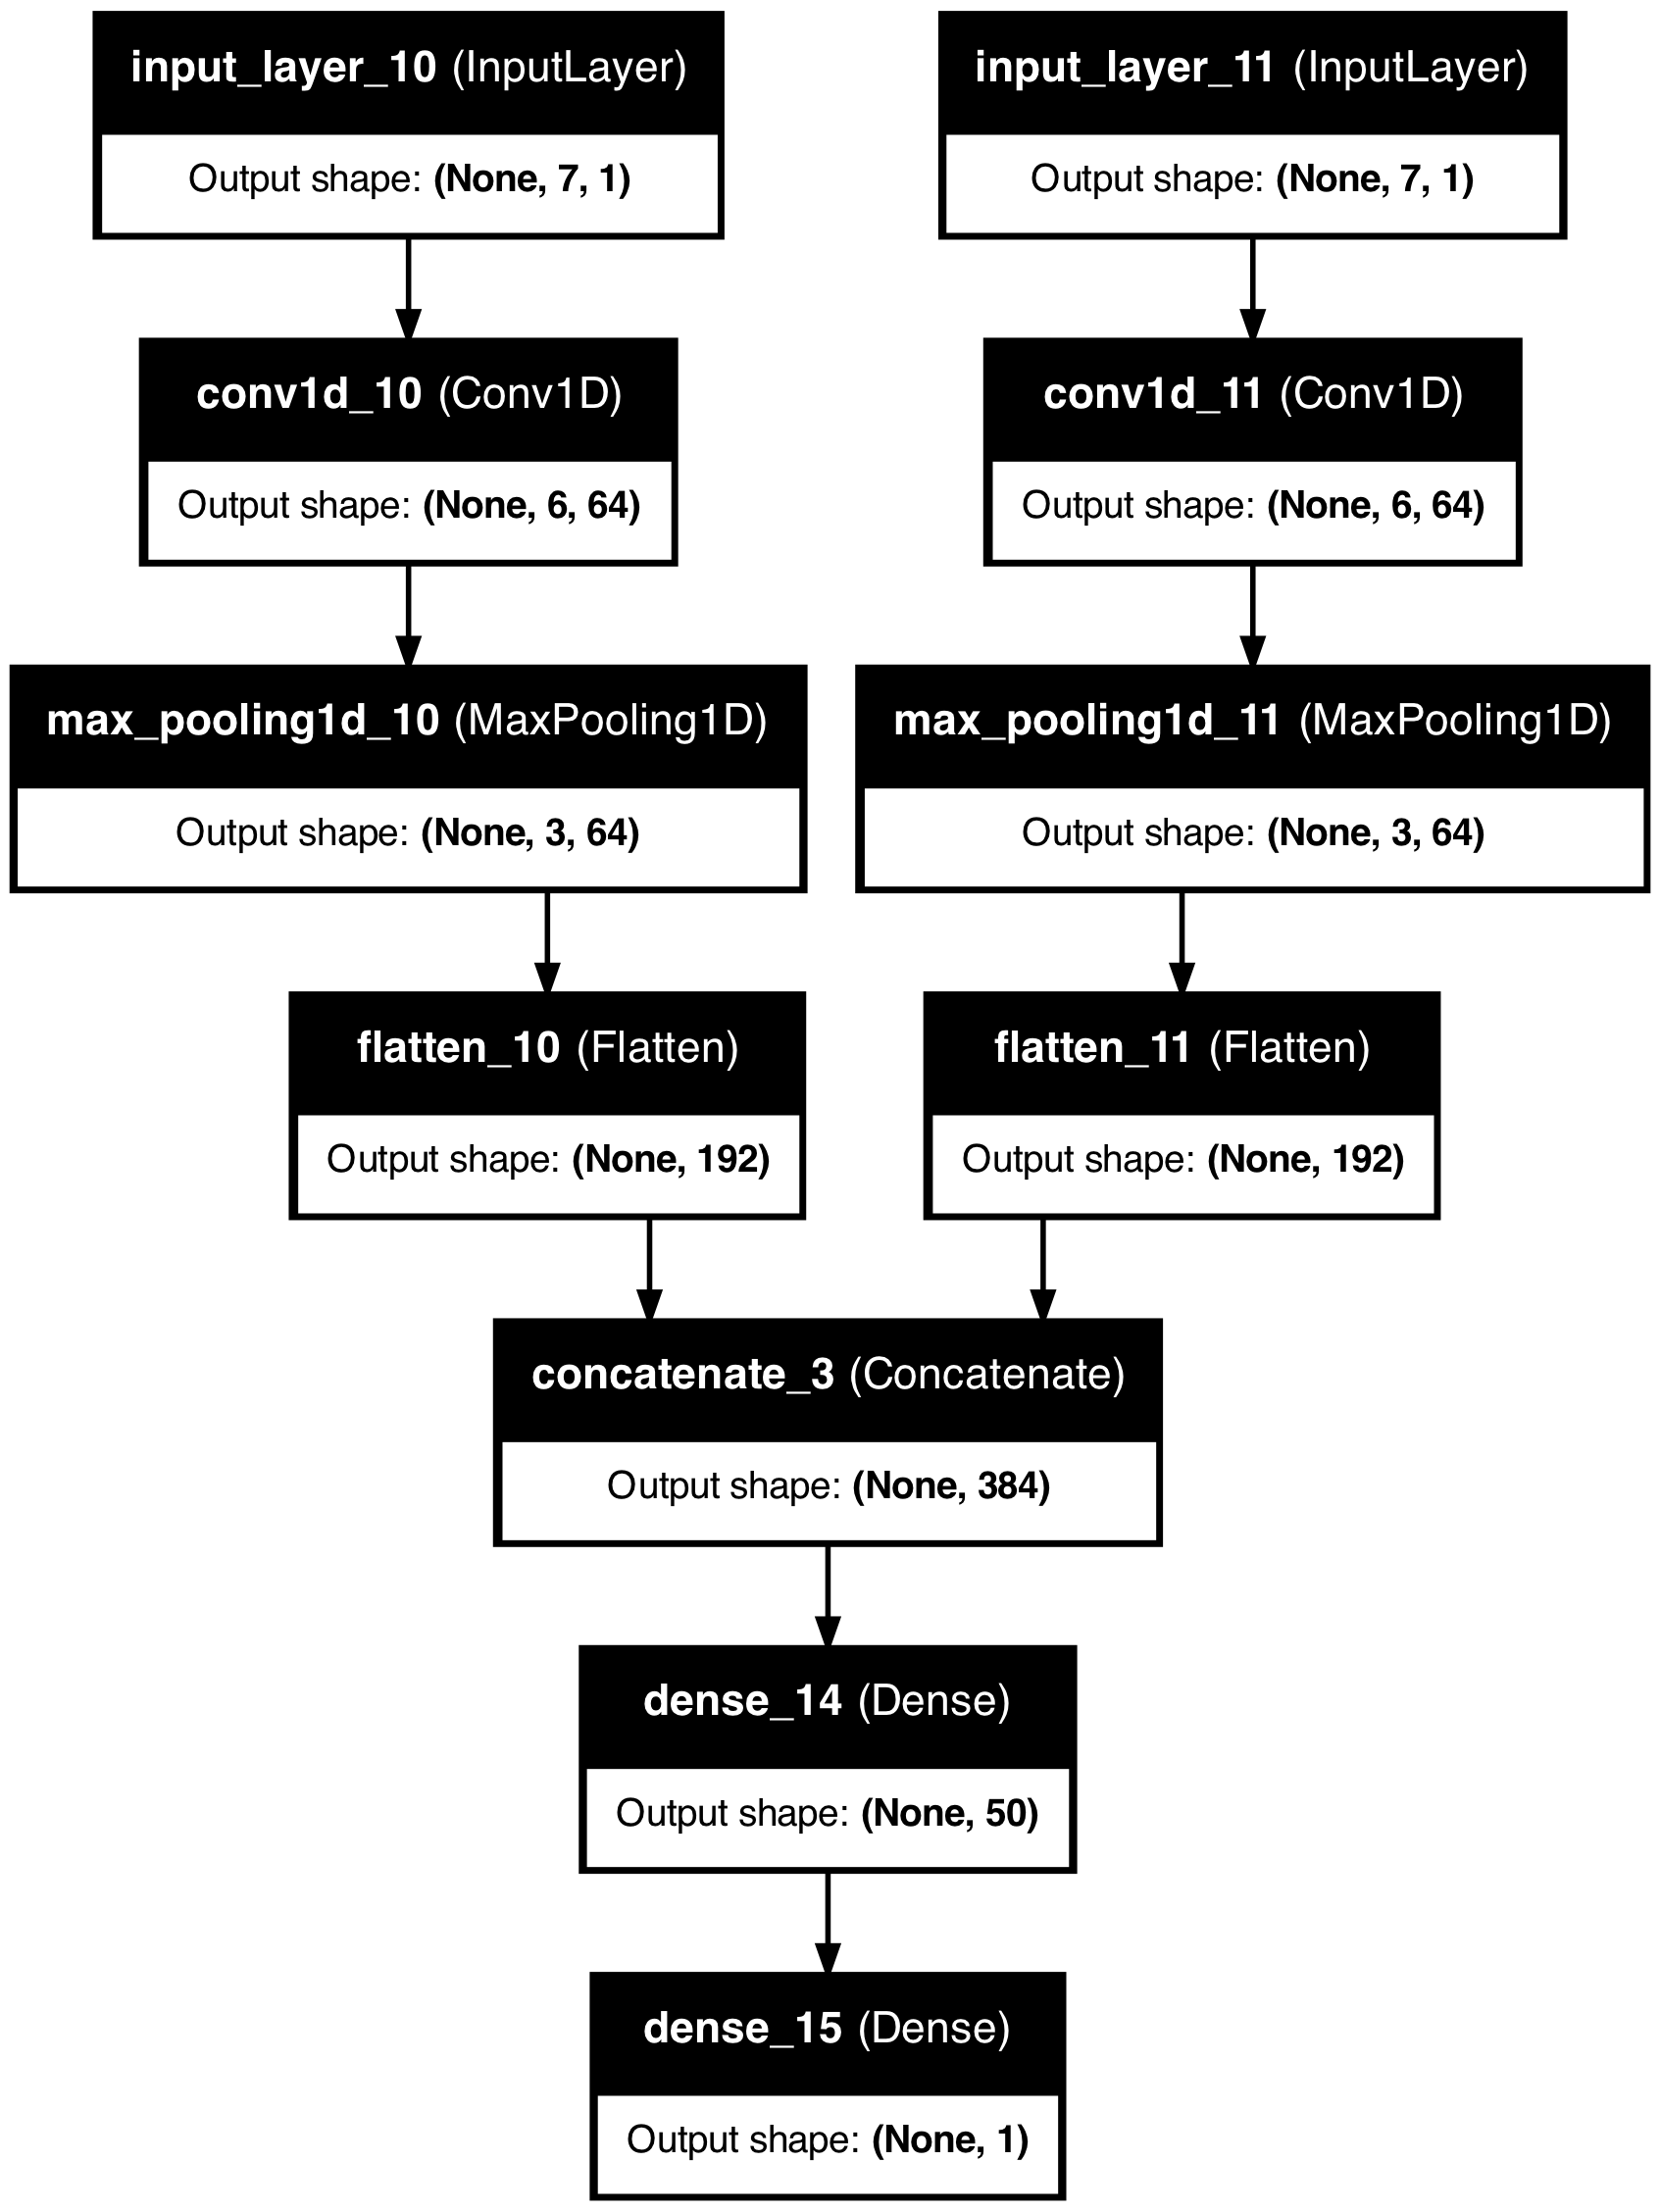

In [54]:
# Seleccionamos todas nuestras columnas menos la de price por lo que los dividimos en 2
X1 = data.drop('price', axis=1).iloc[:, :7]
X2 = data.drop('price', axis=1).iloc[:, 7:]
y = data['price']

# Reajustamos las entradas para que sean compatibles con el modelo
X1 = tf.convert_to_tensor(X1.values.reshape(X1.shape[0], X1.shape[1], 1), dtype=tf.float32)
X2 = tf.convert_to_tensor(X2.values.reshape(X2.shape[0], X2.shape[1], 1), dtype=tf.float32)

n_steps = X1.shape[1]
n_features = 1

# Definimos el modelo
visible1 = Input(shape=(n_steps, n_features))
cnn1 = Conv1D(64, 2, activation='relu')(visible1)
cnn1 = MaxPooling1D()(cnn1)
cnn1 = Flatten()(cnn1)

visible2 = Input(shape=(n_steps, n_features))
cnn2 = Conv1D(64, 2, activation='relu')(visible2)
cnn2 = MaxPooling1D()(cnn2)
cnn2 = Flatten()(cnn2)

merge = concatenate([cnn1, cnn2])
dense = Dense(50, activation='relu')(merge)
output = Dense(1)(dense)

model_3_1 = Model(inputs=[visible1, visible2], outputs=output)
plot_model(model_3_1, show_shapes=True, show_layer_names=True)

<Axes: >

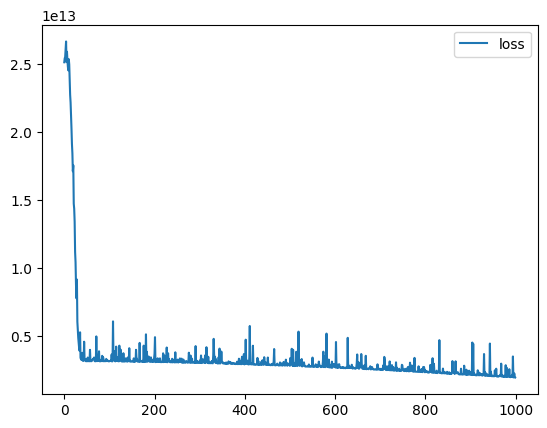

In [55]:
model_3_1.compile(optimizer='adam', loss='mse')

# Entrenamos el modelo
history = model_3_1.fit([X1, X2], y, epochs=1000, verbose=0)

# Graficamos el historial de entrenamiento
pd.DataFrame(history.history).plot()

### 2.2 Múltiples series paralelas (multivariable forecasting)

In [56]:
# dividir una secuencia multivariada en muestras para predicción múltiple
def split_multiple_forecasting_sequence(sequence, n_steps):
    X, y = list(), list()
    for i in range(len(sequence)):
        # encontrar el final de este patrón
        end_ix = i + n_steps
        
        # comprobar si estamos más allá de la secuencia
        if end_ix > len(sequence)-1:
            break
        # reunir partes de entrada y salida del patrón
        seq_x, seq_y = sequence[i:end_ix, :], sequence[end_ix, :]
        X.append(seq_x)
        y.append(seq_y)
    return np.array(X), np.array(y)

In [63]:
X = data.drop('price', axis=1)
y = data['price']

# Reajustamos las entradas para que sean compatibles con el modelo
X = tf.convert_to_tensor(X.values.reshape(X.shape[0], X.shape[1], 1), dtype=tf.float32)
y = tf.convert_to_tensor(y.values.reshape(y.shape[0], 1), dtype=tf.float32)


In [64]:
n_steps = X.shape[1]
n_features = X.shape[2]

model_4 = Sequential()
model_4.add(Conv1D(64, 2, activation='relu', input_shape=(n_steps, n_features)))
model_4.add(MaxPooling1D())
model_4.add(Flatten())
model_4.add(Dense(50, activation='relu'))
model_4.add(Dense(n_features))
model_4.compile(optimizer='adam', loss='mse')
model_4.summary()

/opt/homebrew/Caskroom/miniforge/base/envs/modelos/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d_13 (Conv1D)              │ (None, 13, 64)         │           192 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_13 (MaxPooling1D) │ (None, 6, 64)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_13 (Flatten)            │ (None, 384)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 50)             │        19,250 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 19,493 (76.14 KB)

 Trainable params: 19,493 (76.14 KB)

 Non-trainable params: 0 (0.00 B)

In [65]:
# Entrenamos el modelo
history = model_4.fit(X, y, epochs=100, verbose=0)

### Multi-output CNN Model

In [87]:
X = data.drop('price', axis=1)
y = data['price']

# Reajustamos las entradas para que sean compatibles con el modelo
X = tf.convert_to_tensor(X.values.reshape(X.shape[0], X.shape[1], 1), dtype=tf.float32)

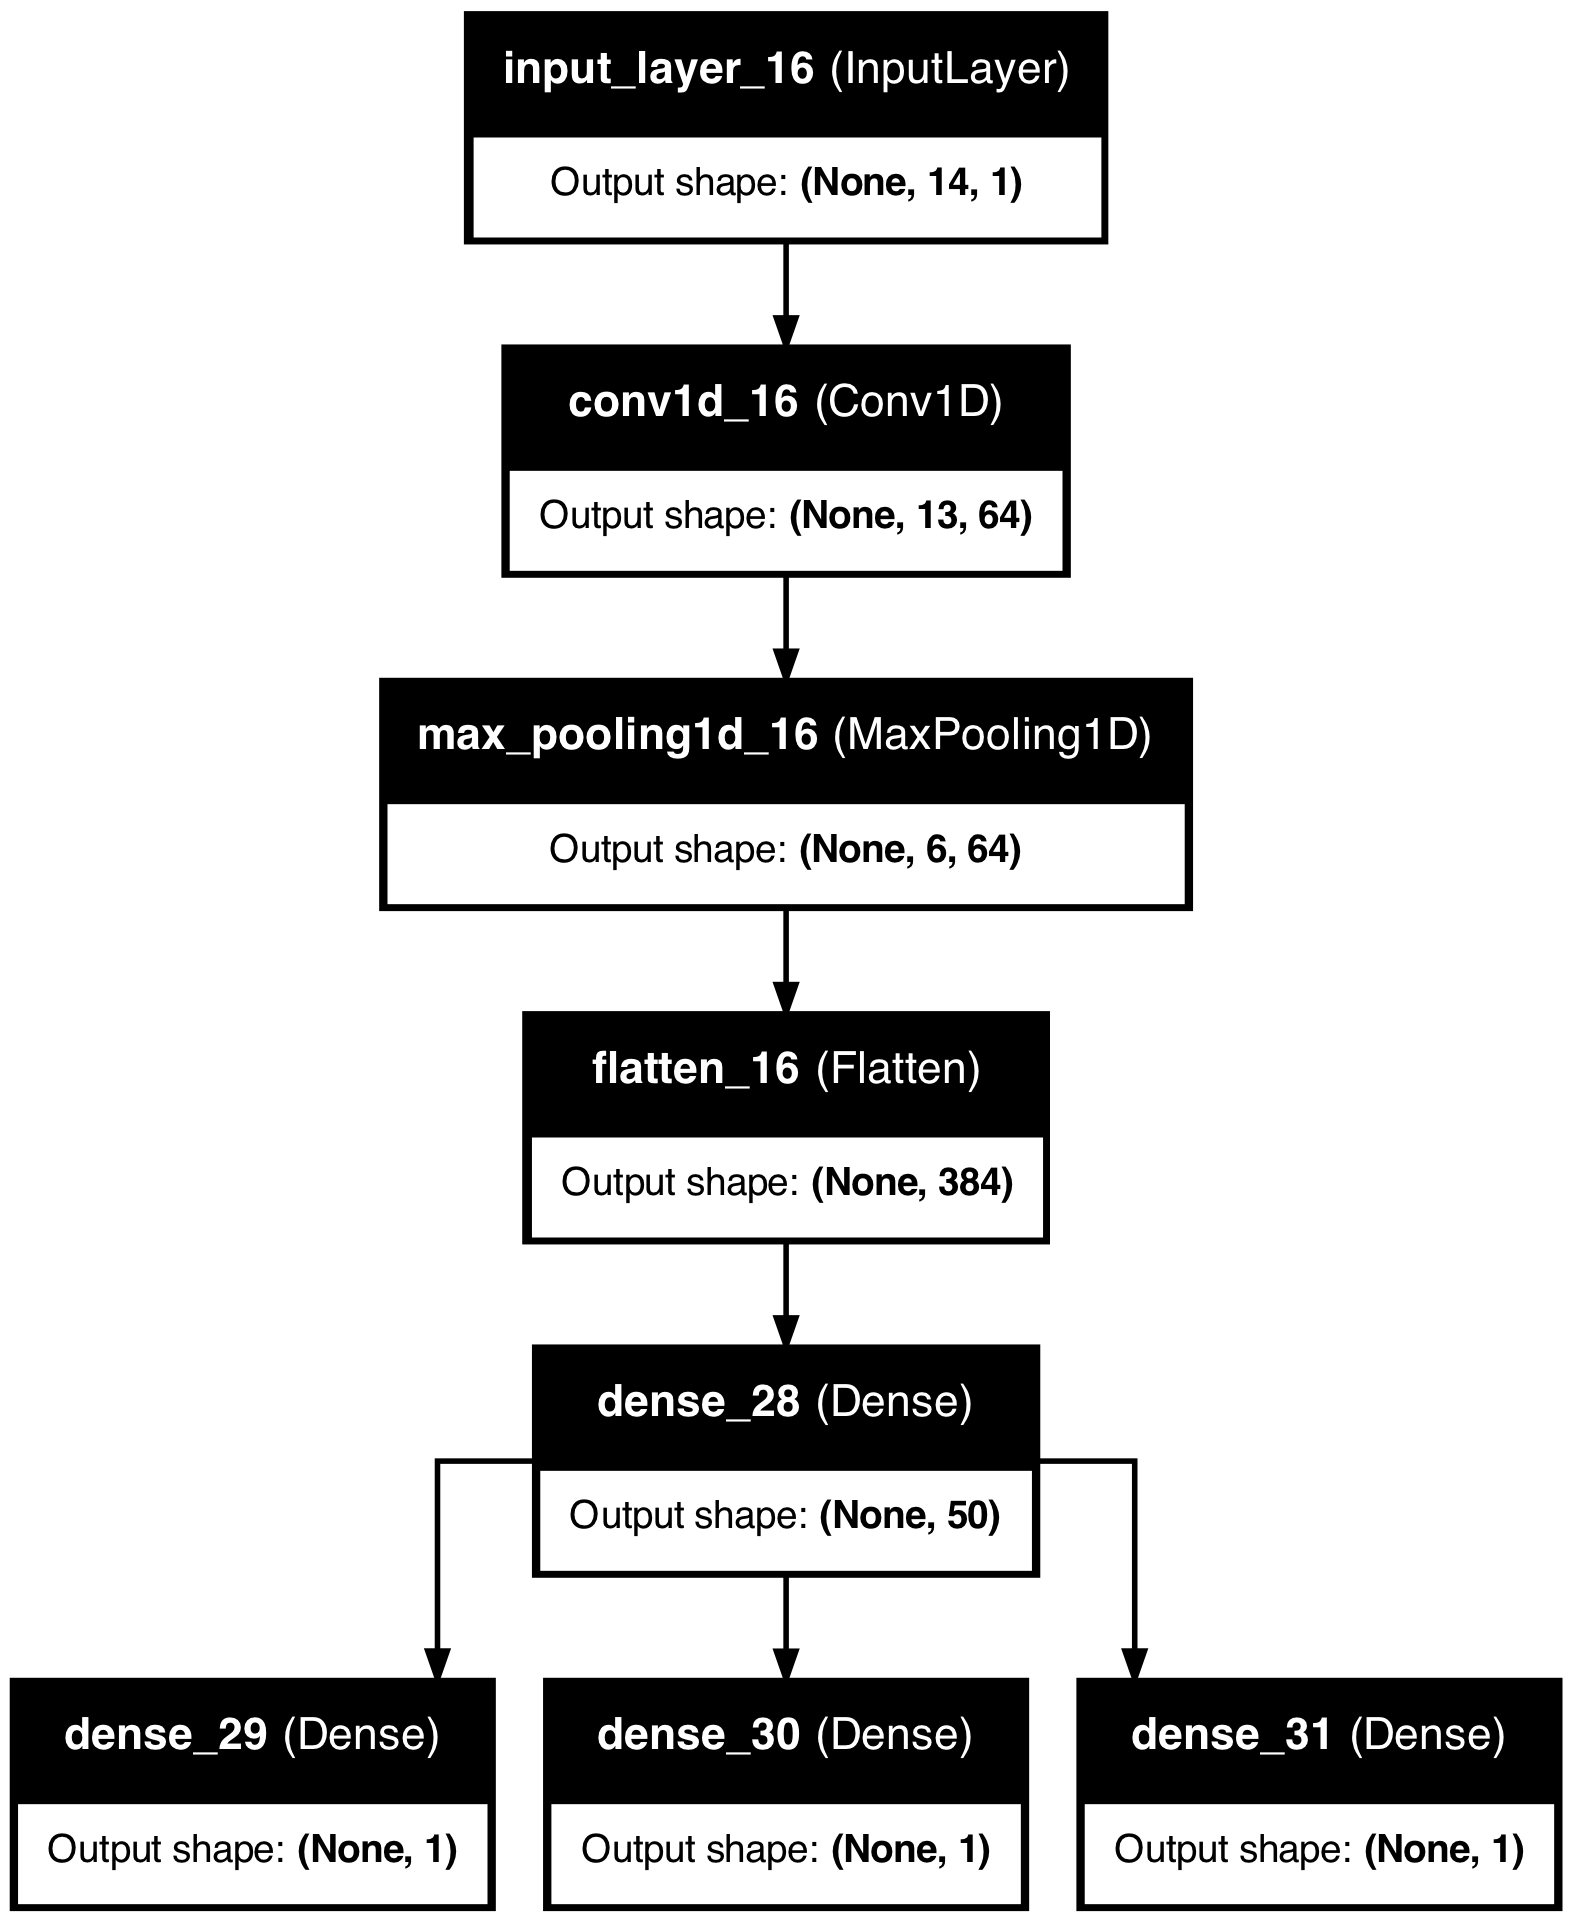

In [88]:
# Definimos el número de pasos y características
n_steps = X.shape[1]
n_features = X.shape[2]

# Definimos el modelo
visible = Input(shape=(n_steps, n_features))
cnn = Conv1D(64, 2, activation='relu')(visible)
cnn = MaxPooling1D()(cnn)
cnn = Flatten()(cnn)
cnn = Dense(50, activation='relu')(cnn)

# Definimos salida 1
output1 = Dense(1)(cnn)
# Definimos salida 2
output2 = Dense(1)(cnn)
# Definimos salida 3
output3 = Dense(1)(cnn)

# Ponemos todo junto
model_5_ = Model(inputs=visible, outputs=[output1, output2, output3])
model_5_.compile(optimizer='adam', loss='mse')
plot_model(model_5_, show_shapes=True, show_layer_names=True)

In [ ]:
y

In [89]:
# Entrenamos el modelo
history = model_5_.fit(X, [y, y, y], epochs=300, verbose=0)

<Axes: >

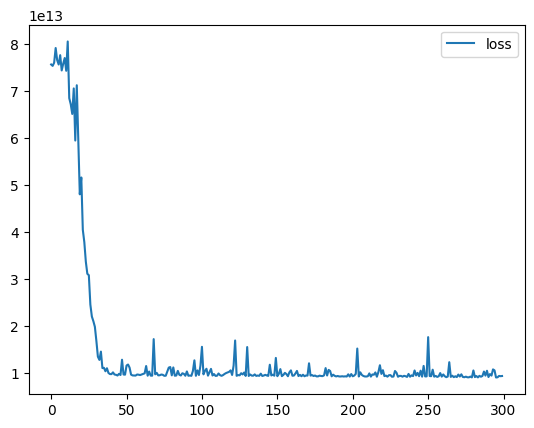

In [90]:
pd.DataFrame(history.history).plot()

## 3. Modelos CNN de pasos múltiples

### 3.1 Serie temporal univariada

In [91]:
X = data.drop('price', axis=1)
y = data['price']

# Reajustamos las entradas para que sean compatibles con el modelo
X = tf.convert_to_tensor(X.values.reshape(X.shape[0], X.shape[1], 1), dtype=tf.float32)

In [92]:
# Definimos el número de pasos y características
n_steps_in, n_steps_out = X.shape[1], 1
n_features = X.shape[2]

# Definimos el modelo
model_6 = Sequential()
model_6.add(Conv1D(64, 2, activation='relu', input_shape=(n_steps_in, n_features)))
model_6.add(MaxPooling1D())
model_6.add(Flatten())
model_6.add(Dense(50, activation='relu'))
model_6.add(Dense(n_steps_out))
model_6.compile(optimizer='adam', loss='mse')

model_6.summary()

/opt/homebrew/Caskroom/miniforge/base/envs/modelos/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d_17 (Conv1D)              │ (None, 13, 64)         │           192 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_17 (MaxPooling1D) │ (None, 6, 64)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_17 (Flatten)            │ (None, 384)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_32 (Dense)                │ (None, 50)             │        19,250 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_33 (Dense)                │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 19,493 (76.14 KB)

 Trainable params: 19,493 (76.14 KB)

 Non-trainable params: 0 (0.00 B)

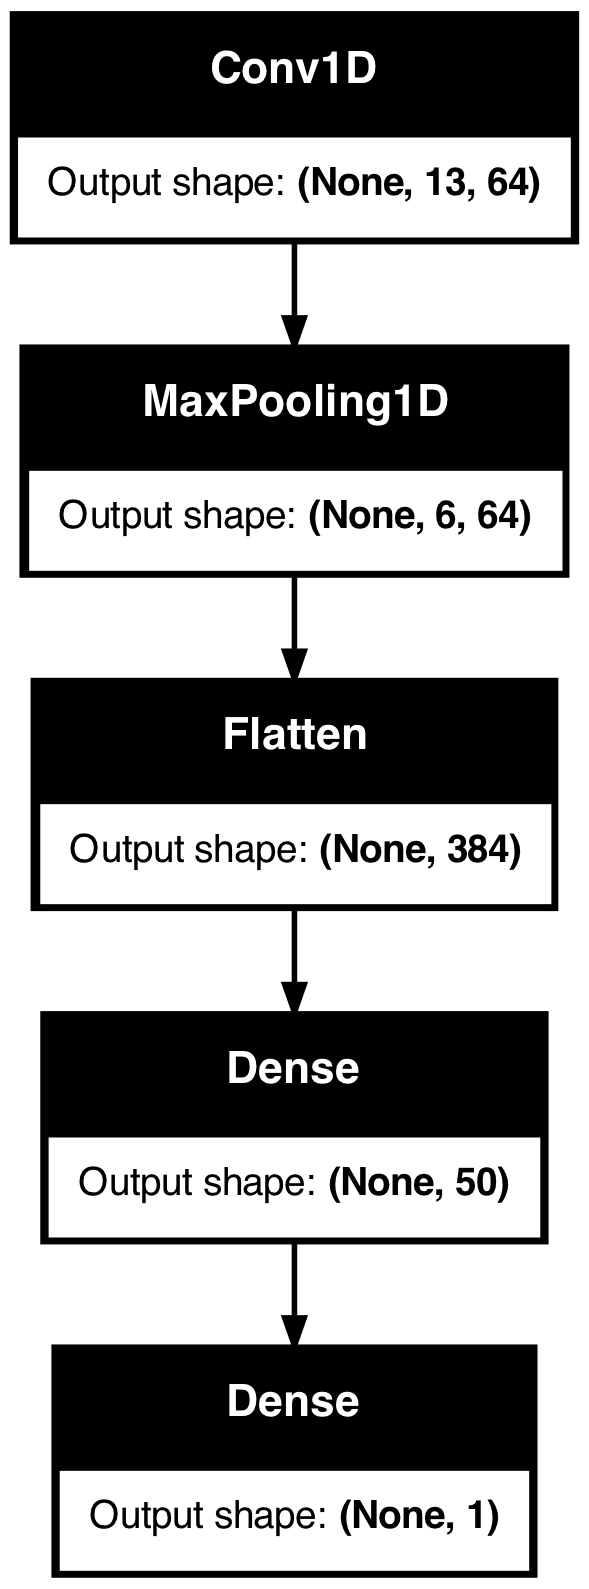

In [93]:

plot_model(model_6, show_layer_names=False, show_shapes=True,)

In [94]:
history = model_6.fit(X, y, epochs=1000, verbose=0)

<Axes: >

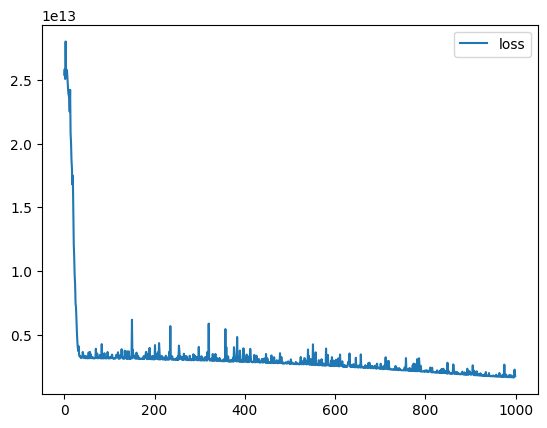

In [95]:
pd.DataFrame(history.history).plot()

### 3.2 Serie temporal multivariada

In [96]:
X = data.drop('price', axis=1)
y = data['price']

# Reajustamos las entradas para que sean compatibles con el modelo
X = tf.convert_to_tensor(X.values.reshape(X.shape[0], X.shape[1], 1), dtype=tf.float32)

In [97]:
# Definimos el número de pasos y características
n_steps_in, n_steps_out = X.shape[1], 1
n_features = X.shape[2]

# Definimos el modelo
model_7 = Sequential()
model_7.add(Conv1D(64, 2, activation='relu', input_shape=(n_steps_in, n_features)))
model_7.add(MaxPooling1D())
model_7.add(Flatten())
model_7.add(Dense(50, activation='relu'))
model_7.add(Dense(n_steps_out))
model_7.compile(optimizer='adam', loss='mse')
model_7.summary()

/opt/homebrew/Caskroom/miniforge/base/envs/modelos/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d_18 (Conv1D)              │ (None, 13, 64)         │           192 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_18 (MaxPooling1D) │ (None, 6, 64)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_18 (Flatten)            │ (None, 384)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_34 (Dense)                │ (None, 50)             │        19,250 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_35 (Dense)                │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 19,493 (76.14 KB)

 Trainable params: 19,493 (76.14 KB)

 Non-trainable params: 0 (0.00 B)

In [98]:
# Entrenamos el modelo
history = model_7.fit(X, y, epochs=500, verbose=0)

<Axes: >

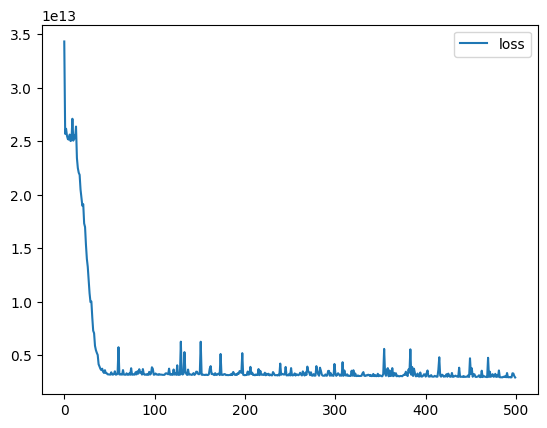

In [99]:
# Graficamos el historial de entrenamiento
pd.DataFrame(history.history).plot()

### 3.3 Serie temporal multivariada predicción múltiple de cada entrada

In [100]:
X = data.drop('price', axis=1)
y = data['price']

# Reajustamos las entradas para que sean compatibles con el modelo
X = tf.convert_to_tensor(X.values.reshape(X.shape[0], X.shape[1], 1), dtype=tf.float32)

In [101]:
# Definimos el número de pasos y características
n_steps_in, n_steps_out = X.shape[1], 1
n_features = X.shape[2]

# Definimos el modelo
model_8 = Sequential()
model_8.add(Conv1D(64, 2, activation='relu', input_shape=(n_steps_in, n_features)))
model_8.add(MaxPooling1D())
model_8.add(Flatten())
model_8.add(Dense(50, activation='relu'))
model_8.add(Dense(n_steps_out))
model_8.compile(optimizer='adam', loss='mse')
model_8.summary()

/opt/homebrew/Caskroom/miniforge/base/envs/modelos/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d_19 (Conv1D)              │ (None, 13, 64)         │           192 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_19 (MaxPooling1D) │ (None, 6, 64)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_19 (Flatten)            │ (None, 384)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_36 (Dense)                │ (None, 50)             │        19,250 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_37 (Dense)                │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 19,493 (76.14 KB)

 Trainable params: 19,493 (76.14 KB)

 Non-trainable params: 0 (0.00 B)

In [102]:
history = model_8.fit(X, y, epochs=1000, verbose=0)

<Axes: >

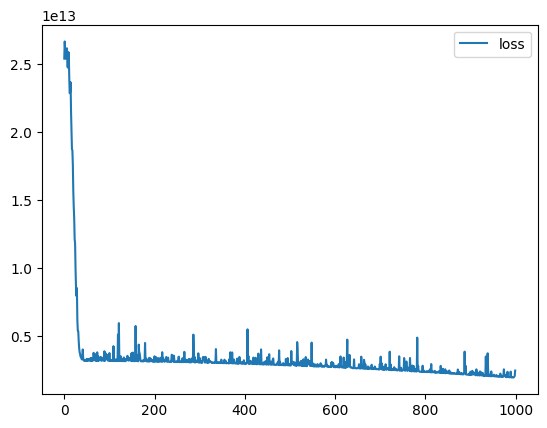

In [103]:
pd.DataFrame(history.history).plot()